**Importing Libraries**

In [4]:
#import libraries for a CNN pytorch model


import numpy as np

#to perform data manipulation
import pandas as pd

#plotting the data
import matplotlib.pyplot as plt
import glob
import cv2
import pickle
import tensorflow as tf


from keras.models import Sequential, Model
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense
import os
from keras.applications.inception_v3 import InceptionV3

from tqdm import tqdm
from copy import copy, deepcopy
import seaborn


**Reading the images**

In [5]:
def read_img(path,size,format=1):
  img = cv2.imread(path, format)
  img = cv2.resize(img, size)

  if format == 0 :   img =  np.expand_dims(img, axis=2)

  return img


In [6]:
#@title Path of the data { form-width: "25%" }
image_folder = "/home/group13/LineasDet/png_train_all/images/" #@param {type:"string"}
mask_folder = "/home/group13/LineasDet/png_train_all/masks/" #@param {type:"string"}

#Resize images (height  = Y, width = X)
size_x = 224
size_y = 224

train_images = []
train_masks = []

same_path = []

for directory_path in glob.glob(image_folder):
    for img_path in glob.glob(os.path.join(directory_path, "*")):
      print(img_path)
      same_path.append(str(img_path))
      train_images.append(read_img(img_path,(size_x,size_y),1))
print(same_path)
same_path = np.char.replace(same_path,'images','masks')
same_path = np.char.replace(same_path,'.png','_mask.png')

for mask_path in same_path:
  print(mask_path)

  train_masks.append(read_img(mask_path,(size_x,size_y),0))


X = np.array(train_images)
y = np.array(train_masks)

y[y>0] = 1

print(np.shape(X))
print(np.shape(y))







/home/group13/LineasDet/png_train_all/images/12ESFRTPLT01EXCERPT1_Equi-cog_5.png
/home/group13/LineasDet/png_train_all/images/E6ESDRKLIN01_Equi-cog_92.png
/home/group13/LineasDet/png_train_all/images/E6ESDRKLIN01_Equi-cog_181.png
/home/group13/LineasDet/png_train_all/images/E6ESDRKLIN01_Equi-cog_241.png
/home/group13/LineasDet/png_train_all/images/G7ESAPEXCR05_Equi-cog_11.png
/home/group13/LineasDet/png_train_all/images/12ESFRTPLT01EXCERPT1_Equi-cog_51.png
/home/group13/LineasDet/png_train_all/images/17ESREGMAP03_Equi-cog_278.png
/home/group13/LineasDet/png_train_all/images/17ESREGMAP01EXCERPT2_Equi-cog_5.png
/home/group13/LineasDet/png_train_all/images/E6ESDRKLIN01_Equi-cog_120.png
/home/group13/LineasDet/png_train_all/images/E6ESDRKLIN01_Equi-cog_371.png
/home/group13/LineasDet/png_train_all/images/25ESDARKBP01_Equi-cog_2.png
/home/group13/LineasDet/png_train_all/images/E6ESDRKLIN01_Equi-cog_237.png
/home/group13/LineasDet/png_train_all/images/E4ESMACSTR01_Equi-cog_38.png
/home/group

**Shuffling the dataset**

In [7]:

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=0)

X_trainm, X_testm, y_trainm, y_testm = train_test_split(X, y, test_size=0.25, random_state=0)

print(np.shape(X_trainm))
print(np.shape(X_testm))
print(np.shape(y_trainm))
print(np.shape(y_testm))





(767, 224, 224, 3)
(256, 224, 224, 3)
(767, 224, 224, 1)
(256, 224, 224, 1)


In [ ]:
#Reshape the data to fit the model
# Reshape the  from (batch, height, width, channels) to (batch, channels, height, width)
X_trainm = X_trainm.transpose(0,3,1,2)
X_testm = X_testm.transpose(0,3,1,2)
y_trainm = y_trainm.transpose(0,3,1,2)
y_testm = y_testm.transpose(0,3,1,2)

print(X_trainm.shape)
print(X_testm.shape)
print(y_trainm.shape)
print(y_testm.shape)


### extra ignore

In [8]:
# from sklearn.model_selection import train_test_split
# X_trainm, X_testm, y_trainm, y_testm = train_test_split(X, y, test_size = 0.25, random_state = 0)



### smote

In [ ]:

# # smotted test train split

# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from sklearn.model_selection import train_test_split

# # Defining own SMOTE


# from sklearn.preprocessing import LabelEncoder


# print(f"Current shape of X: {X.shape}")
# print(f"Current shape of y: {y.shape}")



# # Convert labels to categorical format


# def train_test_split_smotted(X, y, test_size, random_state):
#     smote = SMOTE(sampling_strategy=0.3)
#     X, y = smote.fit_resample(X, y)
#     X_trainm, X_testm, y_trainm, y_testm = train_test_split(X, y, test_size=test_size, random_state=random_state)
#     # rus = RandomUnderSampler(sampling_strategy=0.5)
#     # X, y = rus.fit_resample(X, y)
#     return X_trainm, X_testm, y_trainm, y_testm


# X_trainm, X_testm, y_trainm, y_testm = train_test_split_smotted(X, y, 0.25, 0)


In [11]:
# # reshape the  from (batch, height, width, channels) to (batch, channels, height, width)
# X_trainm = X_trainm.transpose(0,3,1,2)
# X_testm = X_testm.transpose(0,3,1,2)
# y_trainm = y_trainm.transpose(0,3,1,2)
# y_testm = y_testm.transpose(0,3,1,2)

# print(X_trainm.shape)
# print(X_testm.shape)
# print(y_trainm.shape)
# print(y_testm.shape)


### Model

In [12]:
# training the model

# writing a similar pytorch cnn model
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class CNN(nn.Module):
    def __init__(self, activation='relu'):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
        self.conv2 = nn.Conv2d(8, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 32, 3, padding=1)
        self.conv5 = nn.Conv2d(32, 8, 3, padding=1)
        self.conv6 = nn.Conv2d(8, 64, 3, padding=1)
        self.batch_norm = nn.BatchNorm2d(64)  # Batch normalization layer
        
        self.fc1 = nn.Linear(64, 100)
        self.fc2 = nn.Linear(100, 200)
        self.fc3 = nn.Linear(200, 100)
        self.fc4 = nn.Linear(100, 50)
        self.fc5 = nn.Linear(50, 20)
        self.fc6 = nn.Linear(20, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        
        x = self.batch_norm(x)  # Applying batch normalization
        
        # (B, C, H, W) -> (B, H, W, C)
        x = x.permute(0, 2, 3, 1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.softmax(self.fc6(x), dim=1)
        # x = F.sigmoid(self.fc6(x))
        
        # (B, H, W, C) -> (B, C, H, W)
        x = x.permute(0, 3, 1, 2)
        return x
    
    # Binary Loss


    def cross_entropy(y, y_pred):
        return - np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / np.size(y)


    

    
    
import torch.optim as optim

criterion = nn.BCELoss()
train_dataset = TensorDataset(torch.tensor(X_trainm, dtype=torch.float32), torch.tensor(y_trainm, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_testm, dtype=torch.float32), torch.tensor(y_testm, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)  # Define the test_loader


model = CNN()
# Getting all the GPUs and picking the which has most available memory
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

 
# Move the model to GPU if available
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = CNN().to(device)

# Move input tensors to the same device as the model
# inputs = inputs.to(device)
# labels = labels.to(device)


losses = []

optimizer = optim.Adam(model.parameters(), lr=0.0001)

for epoch in range(16):
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        # print(outputs.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        
        
        optimizer.step()
        
        

    print(f'[{epoch + 1}, {i + 1}] loss: {loss.item()}')
    losses.append(loss.item())
    

    
    







#print(losses)          
  # Define the 'losses' variable before plotting
# plt.plot(losses)
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Loss vs Epochs')
# plt.show()



[1, 48] loss: 1.819536566734314
[2, 48] loss: 1.0278940200805664
[3, 48] loss: 1.4208240509033203
[4, 48] loss: 1.0513699054718018
[5, 48] loss: 1.7974965572357178
[6, 48] loss: 1.8114248514175415
[7, 48] loss: 1.699151635169983
[8, 48] loss: 1.3044780492782593
[9, 48] loss: 1.371744990348816
[10, 48] loss: 2.0662596225738525
[11, 48] loss: 1.0173314809799194
[12, 48] loss: 1.5813603401184082
[13, 48] loss: 1.792640209197998
[14, 48] loss: 0.9695493578910828
[15, 48] loss: 1.279991626739502
[16, 48] loss: 1.3729162216186523
[17, 48] loss: 1.7635585069656372
[18, 48] loss: 1.0236917734146118
[19, 48] loss: 1.0217951536178589
[20, 48] loss: 1.682586431503296
[21, 48] loss: 1.641197681427002
[22, 48] loss: 1.5254707336425781
[23, 48] loss: 1.89357328414917
[24, 48] loss: 0.8901926875114441
[25, 48] loss: 1.3682042360305786
[26, 48] loss: 1.213235855102539
[27, 48] loss: 1.455041766166687
[28, 48] loss: 1.5648362636566162
[29, 48] loss: 1.421066164970398
[30, 48] loss: 1.3270334005355835


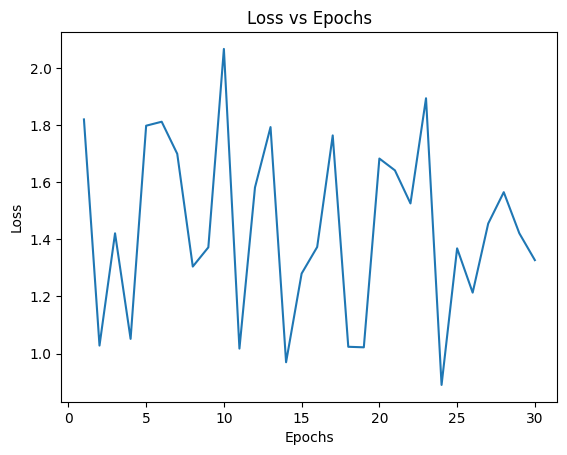

In [13]:

# plot losses vs epochs
y = losses
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]


plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.plot(x,y)
plt.show()

**Evaluating The Model**

In [14]:
#evaluation by IoU method
def iou_score(outputs, labels):
    intersection = np.logical_and(labels, outputs)
    union = np.logical_or(labels, outputs)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

# Evaluate the model on the training set
model.eval()
iou_scores = []
for inputs, labels in train_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    outputs = outputs.cpu().detach().numpy()
    labels = labels.cpu().detach().numpy()
    iou_scores.append(iou_score(outputs, labels))
    
print(f'Training IOU: {np.mean(iou_scores)}')


# Evaluate the model on the test set
model.eval()
iou_scores = []
for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    outputs = outputs.cpu().detach().numpy()
    labels = labels.cpu().detach().numpy()
    iou_scores.append(iou_score(outputs, labels))
    
print(f'Test IOU: {np.mean(iou_scores)}')










Training IOU: 0.2720938044610748
Test IOU: 0.2891893970723055


**Confusion Matrix**

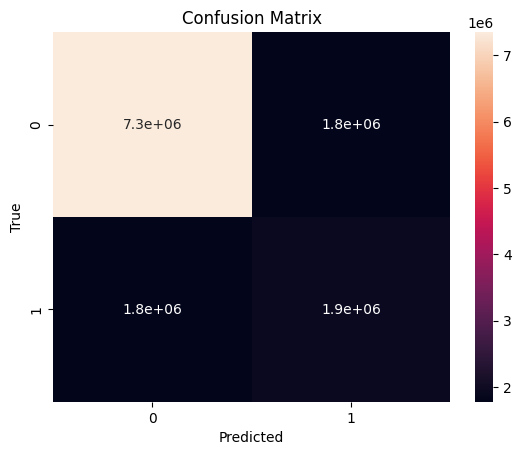

In [15]:


#getting the confusion matrix
from sklearn.metrics import confusion_matrix

model.eval()
y_pred = []
y_true = []
for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    outputs = outputs.cpu().detach().numpy()
    labels = labels.cpu().detach().numpy()
    y_pred.append(outputs)
    y_true.append(labels)

y_pred = np.concatenate(y_pred, axis=0)
y_true = np.concatenate(y_true, axis=0)

y_pred = y_pred > 0.005
y_true = y_true > 0.005

confusion_matrix(y_true.flatten(), y_pred.flatten())

#printing the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true.flatten(), y_pred.flatten())
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()





In [16]:
# #saving the model
# torch.save(model.state_dict(), 'model.pth')

# #loading the model
# model = CNN()
# model.load_state_dict(torch.load('model.pth'))
# model.eval()

# #predicting the output
# model.eval()
# y_pred = []
# y_true = []
# for inputs, labels in test_loader:
#     inputs, labels = inputs.to(device), labels.to(device)
#     outputs = model(inputs)
#     outputs = outputs.cpu().detach().numpy()
#     labels = labels.cpu().detach().numpy()
#     y_pred.append(outputs)
#     y_true.append(labels)
    
# y_pred = np.concatenate(y_pred, axis=0)
# y_true = np.concatenate(y_true, axis=0)

# y_pred = y_pred > 0.5
# y_true = y_true > 0.5

# #plotting the output
# plt.figure(figsize=(10, 10))
# for i in range(16):
#     plt.subplot(4, 4, i + 1)
#     plt.imshow(y_pred[i, 0], cmap='gray')
#     plt.axis('off')
    
# plt.show()


**Predicting Unseen Images**

tensor([[[[0.0024, 0.0034, 0.0027,  ..., 0.0035, 0.0056, 0.0045],
          [0.0036, 0.0032, 0.0031,  ..., 0.0040, 0.0051, 0.0051],
          [0.0029, 0.0027, 0.0023,  ..., 0.0029, 0.0044, 0.0043],
          ...,
          [0.0038, 0.0034, 0.0033,  ..., 0.0023, 0.0030, 0.0033],
          [0.0044, 0.0035, 0.0029,  ..., 0.0032, 0.0043, 0.0042],
          [0.0049, 0.0042, 0.0046,  ..., 0.0032, 0.0034, 0.0038]]]],
       device='cuda:1', grad_fn=<PermuteBackward0>)


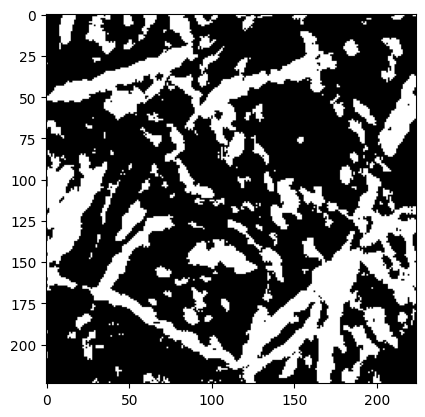

In [17]:
#predicting an unseen image
img = cv2.imread('/home/group13/LineasDet/png_train_all/test/images/11ESREGMAP01EXCERPT1_Equi-cog_0.png', 1)
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
img = img.transpose(0,3,1,2)
img = torch.tensor(img, dtype=torch.float32).to(device)
output = model(img)
print(output)

# give an image output of the prediction
output = output.cpu().detach().numpy()
output = np.squeeze(output)
output[output > 0.005] = 1
output[output <= 0.005] = 0
plt.imshow(output, cmap='gray')
plt.show()


tensor([[[[0.0023, 0.0034, 0.0038,  ..., 0.0080, 0.0067, 0.0063],
          [0.0035, 0.0032, 0.0051,  ..., 0.0134, 0.0089, 0.0081],
          [0.0043, 0.0034, 0.0030,  ..., 0.0117, 0.0104, 0.0099],
          ...,
          [0.0040, 0.0033, 0.0028,  ..., 0.0027, 0.0034, 0.0042],
          [0.0045, 0.0035, 0.0031,  ..., 0.0030, 0.0041, 0.0040],
          [0.0044, 0.0038, 0.0043,  ..., 0.0033, 0.0033, 0.0045]]]],
       device='cuda:1', grad_fn=<PermuteBackward0>)


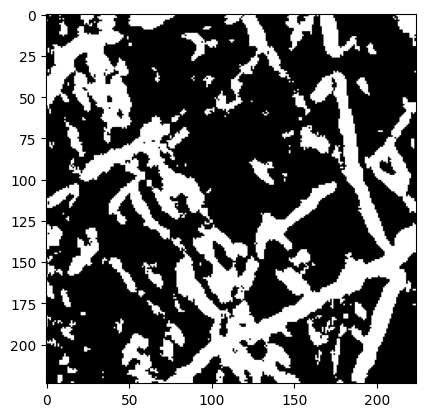

In [18]:
img = cv2.imread('/home/group13/LineasDet/png_train_all/test/images/11ESREGMAP01EXCERPT1_Equi-cog_1.png', 1)
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
img = img.transpose(0,3,1,2)
img = torch.tensor(img, dtype=torch.float32).to(device)
output = model(img)
print(output)

# give an image output of the prediction
output = output.cpu().detach().numpy()
output = np.squeeze(output)
output[output > 0.005] = 1
output[output <= 0.005] = 0
plt.imshow(output, cmap='gray')
plt.show()



tensor([[[[0.0025, 0.0043, 0.0040,  ..., 0.0063, 0.0072, 0.0040],
          [0.0045, 0.0051, 0.0061,  ..., 0.0063, 0.0068, 0.0047],
          [0.0050, 0.0040, 0.0044,  ..., 0.0072, 0.0073, 0.0056],
          ...,
          [0.0025, 0.0022, 0.0022,  ..., 0.0018, 0.0025, 0.0034],
          [0.0032, 0.0024, 0.0021,  ..., 0.0020, 0.0029, 0.0032],
          [0.0034, 0.0032, 0.0032,  ..., 0.0027, 0.0030, 0.0038]]]],
       device='cuda:1', grad_fn=<PermuteBackward0>)


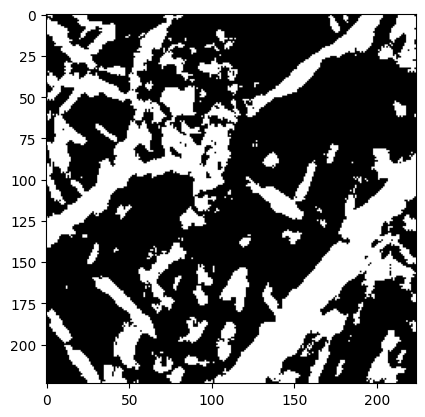

In [19]:
img = cv2.imread('/home/group13/LineasDet/png_train_all/test/images/11ESREGMAP01EXCERPT1_Equi-cog_2.png', 1)
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
img = img.transpose(0,3,1,2)
img = torch.tensor(img, dtype=torch.float32).to(device)
output = model(img)
print(output)

# give an image output of the prediction
output = output.cpu().detach().numpy()
output = np.squeeze(output)
output[output > 0.005] = 1
output[output <= 0.005] = 0
plt.imshow(output, cmap='gray')
plt.show()



tensor([[[[2.9373e-03, 3.4254e-03, 2.8535e-03,  ..., 3.6348e-02,
           5.4496e-02, 5.6339e-02],
          [3.5795e-03, 2.7294e-03, 2.9003e-03,  ..., 5.5023e-02,
           8.4792e-02, 4.1774e-02],
          [3.4369e-03, 2.7117e-03, 3.0131e-03,  ..., 7.2899e-02,
           9.6418e-02, 6.2360e-02],
          ...,
          [3.9033e-03, 3.5112e-03, 3.7278e-03,  ..., 1.1751e-05,
           1.1022e-05, 2.1815e-05],
          [6.1615e-03, 5.9315e-03, 4.7597e-03,  ..., 1.7991e-05,
           1.5613e-05, 2.6617e-05],
          [4.0496e-03, 4.2930e-03, 5.4256e-03,  ..., 4.4883e-05,
           3.4874e-05, 5.0926e-05]]]], device='cuda:1',
       grad_fn=<PermuteBackward0>)


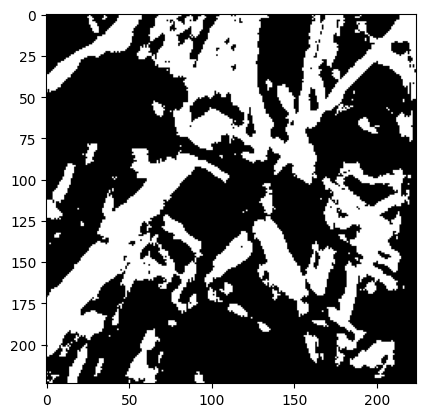

In [20]:
img = cv2.imread('/home/group13/LineasDet/png_train_all/test/images/11ESREGMAP01EXCERPT1_Equi-cog_3.png', 1)
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
img = img.transpose(0,3,1,2)
img = torch.tensor(img, dtype=torch.float32).to(device)
output = model(img)
print(output)

# give an image output of the prediction
output = output.cpu().detach().numpy()
output = np.squeeze(output)
output[output > 0.005] = 1
output[output <= 0.005] = 0
plt.imshow(output, cmap='gray')
plt.show()



tensor([[[[0.0031, 0.0046, 0.0043,  ..., 0.0062, 0.0064, 0.0070],
          [0.0040, 0.0034, 0.0044,  ..., 0.0057, 0.0064, 0.0066],
          [0.0034, 0.0038, 0.0039,  ..., 0.0057, 0.0062, 0.0056],
          ...,
          [0.0045, 0.0026, 0.0032,  ..., 0.0029, 0.0033, 0.0038],
          [0.0043, 0.0035, 0.0042,  ..., 0.0039, 0.0043, 0.0038],
          [0.0049, 0.0040, 0.0055,  ..., 0.0053, 0.0041, 0.0044]]]],
       device='cuda:1', grad_fn=<PermuteBackward0>)


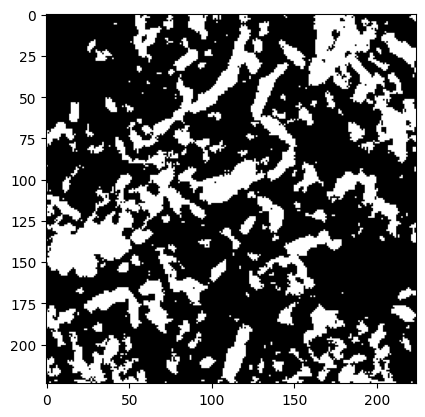

In [21]:
img = cv2.imread('/home/group13/LineasDet/png_train_all/test/images/11ESREGMAP01EXCERPT1_Equi-cog_4.png', 1)
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
img = img.transpose(0,3,1,2)
img = torch.tensor(img, dtype=torch.float32).to(device)
output = model(img)
print(output)

# give an image output of the prediction
output = output.cpu().detach().numpy()
output = np.squeeze(output)
output[output > 0.005] = 1
output[output <= 0.005] = 0
plt.imshow(output, cmap='gray')
plt.show()



tensor([[[[0.0029, 0.0069, 0.0056,  ..., 0.0028, 0.0032, 0.0055],
          [0.0053, 0.0080, 0.0078,  ..., 0.0026, 0.0038, 0.0049],
          [0.0056, 0.0054, 0.0060,  ..., 0.0023, 0.0033, 0.0035],
          ...,
          [0.0032, 0.0029, 0.0026,  ..., 0.0029, 0.0032, 0.0040],
          [0.0040, 0.0035, 0.0029,  ..., 0.0029, 0.0037, 0.0039],
          [0.0033, 0.0038, 0.0039,  ..., 0.0033, 0.0034, 0.0046]]]],
       device='cuda:1', grad_fn=<PermuteBackward0>)


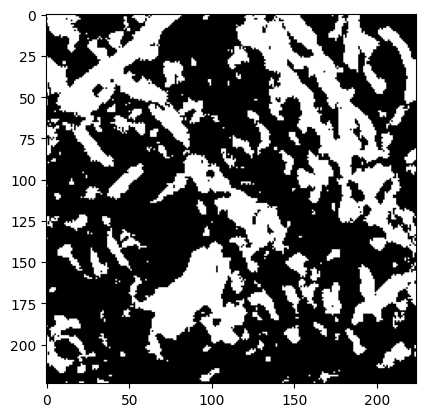

In [22]:
img = cv2.imread('/home/group13/LineasDet/png_train_all/test/images/11ESREGMAP01EXCERPT1_Equi-cog_5.png', 1)
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
img = img.transpose(0,3,1,2)
img = torch.tensor(img, dtype=torch.float32).to(device)
output = model(img)
print(output)

# give an image output of the prediction
output = output.cpu().detach().numpy()
output = np.squeeze(output)
output[output > 0.005] = 1
output[output <= 0.005] = 0
plt.imshow(output, cmap='gray')
plt.show()

